# **Installing/Importing Libraries**

In [ ]:
!pip install Keras-Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from collections import Counter
from textblob import Word
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras_preprocessing.sequence import pad_sequences
#from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import re

In [ ]:
from keras.utils import to_categorical

In [ ]:
!pip install ktrain
import ktrain
from ktrain import text
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
#df=pd.read_csv('/content/Test Data FAQ Headings_Final.txt')

In [ ]:
#df=pd.read_csv('/content/Test Data FAQ Headings_TransactionModV4.txt')

In [ ]:
df['Intent'].value_counts()

Intent
Property Details       2939
Customer Services      2478
General Services       2264
Transaction            1769
Financial Services     1414
Technology Services    1049
Name: count, dtype: int64

# **Preprocessing**

In [ ]:
#df.to_csv("/content/Test Data FAQ Headings_TransactionModV4.txt", index=False)

In [ ]:
df.to_csv("/content/Test Data FAQ Headings_Final.txt", index=False)

In [ ]:
df['lower_case'] = df['Question'].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))

df['alphabatic'] = df['lower_case'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
df['without-link'] = df['alphabatic'].apply(lambda x: re.sub(r'http\S+', '', x))

tokenizer = RegexpTokenizer(r'\w+')
df['Special_word'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1)

stop = [word for word in stopwords.words('english') if word not in ["my","haven't","aren't","can","no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]

df['stop_words'] = df['Special_word'].apply(lambda x: [item for item in x if item not in stop])
df['stop_words'] = df['stop_words'].astype('str')

df['short_word'] = df['stop_words'].str.findall('\w{2,}')
df['string']=df['short_word'].str.join(' ')

df['Text'] = df['string'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
df

,Question,Intent,lower_case,alphabatic,without-link,Special_word,stop_words,short_word,string,Text
0,is it possible to book a virtual viewing with ...,Technology Services,is it possible to book a virtual viewing with ...,is it possible to book a virtual viewing with ...,is it possible to book a virtual viewing with ...,"[is, it, possible, to, book, a, virtual, viewi...","['possible', 'book', 'virtual', 'viewing', 'ag...","[possible, book, virtual, viewing, agent]",possible book virtual viewing agent,possible book virtual viewing agent
1,can i book virtual viewings with an agent?,Technology Services,can i book virtual viewings with an agent?,can i book virtual viewings with an agent,can i book virtual viewings with an agent,"[can, i, book, virtual, viewings, with, an, ag...","['can', 'book', 'virtual', 'viewings', 'agent']","[can, book, virtual, viewings, agent]",can book virtual viewings agent,can book virtual viewing agent
2,can i book a virtual viewing with an agent?,Technology Services,can i book a virtual viewing with an agent?,can i book a virtual viewing with an agent,can i book a virtual viewing with an agent,"[can, i, book, a, virtual, viewing, with, an, ...","['can', 'book', 'virtual', 'viewing', 'agent']","[can, book, virtual, viewing, agent]",can book virtual viewing agent,can book virtual viewing agent
3,is there a way to view floor plans online?,Technology Services,is there a way to view floor plans online?,is there a way to view floor plans online,is there a way to view floor plans online,"[is, there, a, way, to, view, floor, plans, on...","['way', 'view', 'floor', 'plans', 'online']","[way, view, floor, plans, online]",way view floor plans online,way view floor plan online
4,is it possible to see floor plans online?,Technology Services,is it possible to see floor plans online?,is it possible to see floor plans online,is it possible to see floor plans online,"[is, it, possible, to, see, floor, plans, online]","['possible', 'see', 'floor', 'plans', 'online']","[possible, see, floor, plans, online]",possible see floor plans online,possible see floor plan online
...,...,...,...,...,...,...,...,...,...,...
11272,tell me the property tax in the scottish borders?,Property Details,tell me the property tax in the scottish borders?,tell me the property tax in the scottish borders,tell me the property tax in the scottish borders,"[tell, me, the, property, tax, in, the, scotti...","['tell', 'property', 'tax', 'scottish', 'borde...","[tell, property, tax, scottish, borders]",tell property tax scottish borders,tell property tax scottish border
11273,tell me the property tax rates in the scottish...,Property Details,tell me the property tax rates in the scottish...,tell me the property tax rates in the scottish...,tell me the property tax rates in the scottish...,"[tell, me, the, property, tax, rates, in, the,...","['tell', 'property', 'tax', 'rates', 'scottish...","[tell, property, tax, rates, scottish, borders]",tell property tax rates scottish borders,tell property tax rate scottish border
11274,which are the property tax rates in the scotti...,Property Details,which are the property tax rates in the scotti...,which are the property tax rates in the scotti...,which are the property tax rates in the scotti...,"[which, are, the, property, tax, rates, in, th...","['property', 'tax', 'rates', 'scottish', 'bord...","[property, tax, rates, scottish, borders]",property tax rates scottish borders,property tax rate scottish border
11275,what are the property taxes in the scottish bo...,Property Details,what are the property taxes in the scottish bo...,what are the property taxes in the scottish bo...,what are the property taxes in the scottish bo...,"[what, are, the, property, taxes, in, the, sco...","['property', 'taxes', 'scottish', 'borders']","[property, taxes, scottish, borders]",property taxes scottish borders,property tax scottish border


# **Visualisations**

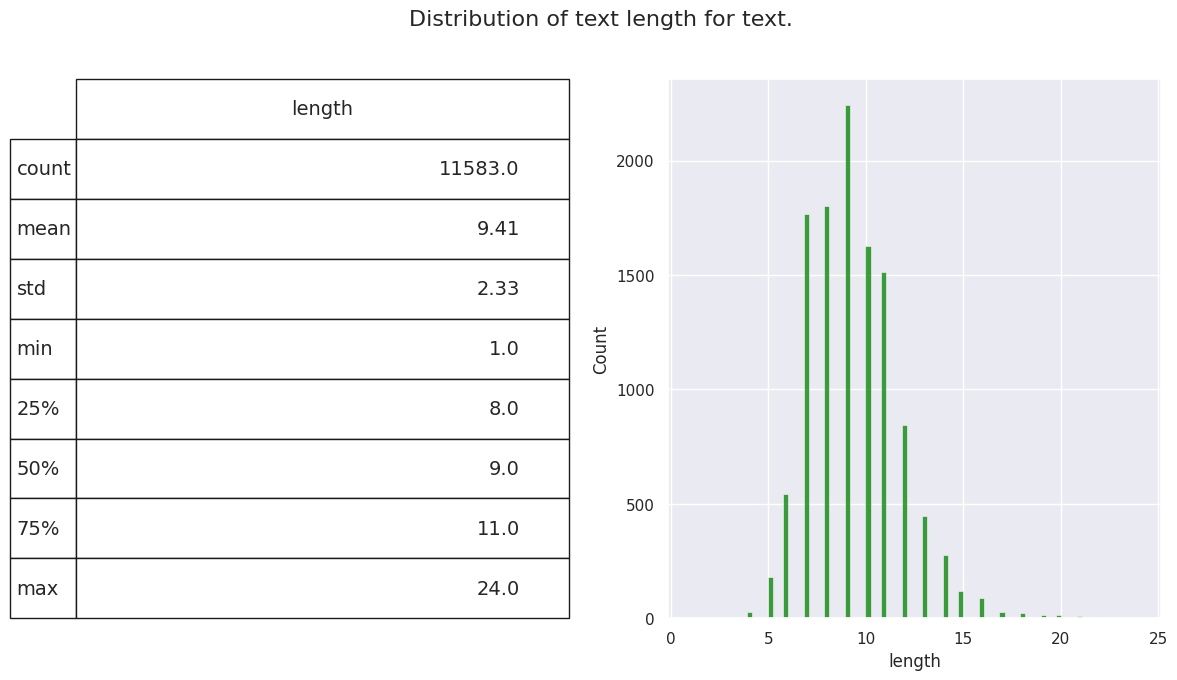

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Question.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()

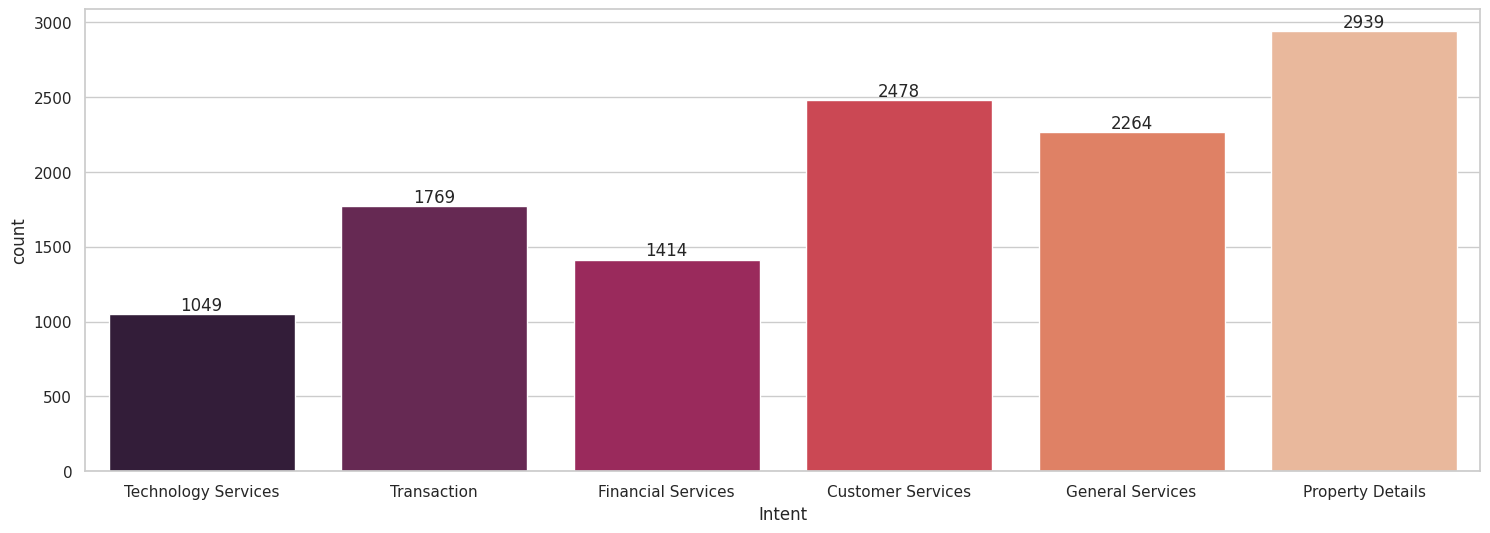

In [ ]:
fig = plt.figure(figsize=(18,6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=df["Intent"], palette = "rocket")
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()
#ax.bar_label(ax.containers[0])

In [ ]:
top = Counter([item for sublist in df['short_word'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
property_details_text = df[df['Intent']=='Property Details']
customer_services_text = df[df['Intent']=='Customer Services']
general_services_text = df[df['Intent']=='General Services']
financial_services_text = df[df['Intent']=='Financial Services']
technology_services_text = df[df['Intent']=='Technology Services']
transaction_text = df[df['Intent']=='Transaction']

In [ ]:
top = Counter([item for sublist in transaction_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in transaction_text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

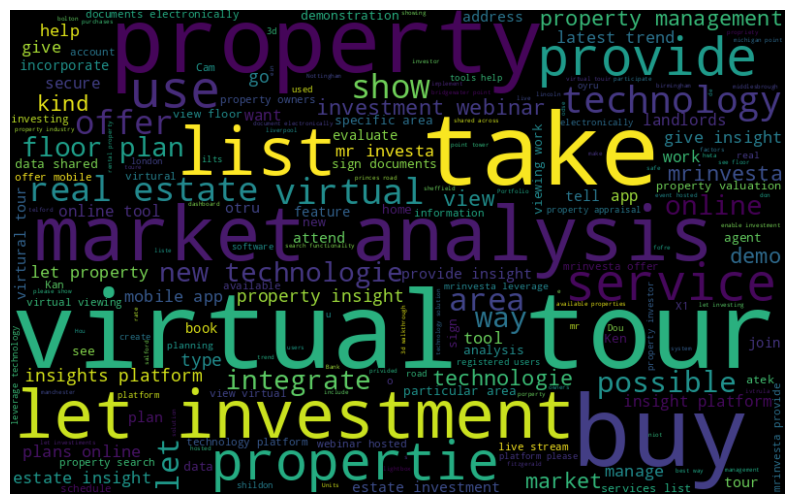

In [ ]:
normal_words =' '.join([text for text in df['Question'][df['Intent'] == 'Transaction']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Applying N-gram

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df["Question"],df["Intent"], test_size = 0.20, random_state = 42)
count_vect = CountVectorizer(ngram_range=(1, 2))
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(9530, 16088) (2383, 16088) (9530,) (2383,)


In [ ]:
joblib.dump(count_vect, 'count_vect.pkl')
#model = joblib.load('count_vect.pkl')

['count_vect.pkl']

# **ML Models**

Logistic Regression

In [ ]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Accuracy: 0.9790180444817457
                     precision    recall  f1-score   support

  Customer Services       0.99      0.99      0.99       496
 Financial Services       0.97      0.96      0.96       300
   General Services       0.97      1.00      0.98       451
   Property Details       0.99      0.99      0.99       574
Technology Services       0.99      0.89      0.94       211
        Transaction       0.97      0.99      0.98       351

           accuracy                           0.98      2383
          macro avg       0.98      0.97      0.97      2383
       weighted avg       0.98      0.98      0.98      2383



SVM

In [ ]:
svc = LinearSVC()
svc.fit(x_train_tfidf, y_train)
y_pred2 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

Accuracy: 0.990348300461603
                     precision    recall  f1-score   support

  Customer Services       1.00      0.99      0.99       496
 Financial Services       0.98      0.99      0.98       300
   General Services       0.98      1.00      0.99       451
   Property Details       0.99      1.00      1.00       574
Technology Services       0.99      0.95      0.97       211
        Transaction       0.99      0.99      0.99       351

           accuracy                           0.99      2383
          macro avg       0.99      0.99      0.99      2383
       weighted avg       0.99      0.99      0.99      2383



Naive Bayes(Multinomial)

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred3))

Accuracy: 0.9391523289970626
                     precision    recall  f1-score   support

  Customer Services       0.94      0.99      0.96       496
 Financial Services       0.97      0.91      0.94       300
   General Services       0.87      1.00      0.93       451
   Property Details       0.96      0.98      0.97       574
Technology Services       0.99      0.64      0.78       211
        Transaction       0.97      0.94      0.95       351

           accuracy                           0.94      2383
          macro avg       0.95      0.91      0.92      2383
       weighted avg       0.94      0.94      0.94      2383



In [ ]:
mc = count_vect.transform(["How can I talk to a real consultant"])
m = transformer.transform(mc)
y_pred = mnb.predict(m)
print(y_pred)

['Customer Services']


In [ ]:
scores = cross_val_score(mnb, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred3))
print ("Cross-validated scores:", scores)

0.9391523289970626
Cross-validated scores: [0.93809024 0.92864638 0.93494229 0.92759706 0.94438615 0.93389297
 0.94858342 0.93494229 0.92549843 0.93913956]


Randomforest

In [ ]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(x_train_tfidf,y_train)
y_pred4 = rfc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred4)))
print(classification_report(y_test, y_pred4))

Accuracy: 0.8514477549307595
                     precision    recall  f1-score   support

  Customer Services       0.92      0.91      0.91       496
 Financial Services       0.86      0.79      0.82       300
   General Services       0.87      0.85      0.86       451
   Property Details       0.94      0.92      0.93       574
Technology Services       0.51      0.82      0.63       211
        Transaction       0.96      0.73      0.83       351

           accuracy                           0.85      2383
          macro avg       0.84      0.84      0.83      2383
       weighted avg       0.87      0.85      0.86      2383



In [ ]:
mc = count_vect.transform(["I want to sell a property"])
m = transformer.transform(mc)
y_pred = rfc.predict(m)
print(y_pred)

['Transaction']


GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100, max_features='auto', max_depth=4, random_state=1, verbose=1)
gbc.fit(x_train_tfidf, y_train)
y_pred5 = gbc.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

      Iter       Train Loss   Remaining Time 
         1           1.5070            2.90m
         2           1.3586            2.38m
         3           1.2428            2.03m
         4           1.1513            1.78m
         5           1.0767            1.59m
         6           1.0132            1.45m
         7           0.9590            1.35m
         8           0.9092            1.28m
         9           0.8666            1.22m
        10           0.8280            1.16m
        20           0.5891           54.46s
        30           0.4805           46.65s
        40           0.4143           38.05s
        50           0.3649           32.20s
        60           0.3286           25.01s
        70           0.2980           18.78s
        80           0.2719           12.40s
        90           0.2505            6.10s
       100           0.2322            0.00s
0.9408308854385229
                     precision    recall  f1-score   support

  Customer Service

Ensemble Classifier

In [ ]:
mnb = MultinomialNB()
rfc= RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
svc = SVC(probability=True)
ec=VotingClassifier(estimators=[('Multinominal NB', mnb), ('Random Forest', rfc),('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,2,3,4])
ec.fit(x_train_tfidf,y_train)
y_pred6 = ec.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

0.985732270247587
                     precision    recall  f1-score   support

  Customer Services       0.99      0.99      0.99       496
 Financial Services       0.98      0.98      0.98       300
   General Services       0.98      1.00      0.99       451
   Property Details       0.99      1.00      0.99       574
Technology Services       0.99      0.92      0.95       211
        Transaction       0.98      0.99      0.99       351

           accuracy                           0.99      2383
          macro avg       0.99      0.98      0.98      2383
       weighted avg       0.99      0.99      0.99      2383



In [ ]:
mc = count_vect.transform(["Show me the most expensive properties in Manchester"])
m = transformer.transform(mc)
y_pred = ec.predict(m)
print(y_pred)

['Property Details']


AdaBoost with Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=0)
abc= AdaBoostClassifier(base_estimator=rfc, learning_rate=0.2, n_estimators=100)
abc.fit(x_train_tfidf, y_train)
y_pred7= abc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test, y_pred7)))
print(classification_report(y_test, y_pred7))

Accuracy: 0.9542593369702056
                     precision    recall  f1-score   support

  Customer Services       0.99      0.98      0.98       496
 Financial Services       0.97      0.92      0.95       300
   General Services       0.91      0.99      0.95       451
   Property Details       0.99      0.98      0.98       574
Technology Services       0.94      0.81      0.87       211
        Transaction       0.90      0.95      0.92       351

           accuracy                           0.95      2383
          macro avg       0.95      0.94      0.94      2383
       weighted avg       0.96      0.95      0.95      2383



**Comparison between ML Models**

In [ ]:
Comparison_unibi = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred1)*100,f1_score(y_test,y_pred1,average='macro')*100,recall_score(y_test, y_pred1,average='micro')*100,precision_score(y_test, y_pred1,average='micro')*100],
                            'SV Classifier':[accuracy_score(y_test,y_pred2)*100,f1_score(y_test,y_pred2,average='macro')*100,recall_score(y_test, y_pred2,average='micro')*100,precision_score(y_test, y_pred2,average='micro')*100],
                           'MN Naive Bayes':[accuracy_score(y_test,y_pred3)*100,f1_score(y_test,y_pred3,average='macro')*100,recall_score(y_test, y_pred3,average='micro')*100,precision_score(y_test, y_pred3,average='micro')*100],
                           'Random Forest':[accuracy_score(y_test,y_pred4)*100,f1_score(y_test,y_pred4,average='macro')*100,recall_score(y_test, y_pred4,average='micro')*100,precision_score(y_test, y_pred4,average='micro')*100],
                           'GradientBoosting':[accuracy_score(y_test,y_pred5)*100,f1_score(y_test,y_pred5,average='macro')*100,recall_score(y_test, y_pred5,average='micro')*100,precision_score(y_test, y_pred5,average='micro')*100],
                           'Ensembled':[accuracy_score(y_test,y_pred6)*100,f1_score(y_test,y_pred6,average='macro')*100,recall_score(y_test, y_pred6,average='micro')*100,precision_score(y_test, y_pred6,average='micro')*100],
                           'AdaBoost RF':[accuracy_score(y_test,y_pred7)*100,f1_score(y_test,y_pred7,average='macro')*100,recall_score(y_test, y_pred7,average='micro')*100,precision_score(y_test, y_pred7,average='micro')*100],

})

In [ ]:
Comparison_unibi = Comparison_unibi.applymap(lambda x: round(x, 1))
print ('Comparison using uni-bi-gram(1,2)')
Comparison_unibi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_unibi.head(7)

Comparison using uni-bi-gram(1,2)


,Logistic Regression,SV Classifier,MN Naive Bayes,Random Forest,GradientBoosting,Ensembled,AdaBoost RF
Accuracy,97.9,99.0,93.9,85.1,94.1,98.6,95.4
F1_score,97.4,98.8,92.1,83.0,92.9,98.2,94.3
Recall,97.9,99.0,93.9,85.1,94.1,98.6,95.4
Precision,97.9,99.0,93.9,85.1,94.1,98.6,95.4


In [ ]:
ML_comparison = {
    "Algorithm": ['SVC', 'Ensembled', 'Logistic Regression', 'GradientBoosting', 'AdaBoost RF', 'Naive Bayes', 'Random Forest',],
    "Accuracy %": [accuracy_score(y_test,y_pred2)*100,accuracy_score(y_test,y_pred6)*100,accuracy_score(y_test,y_pred1)*100,accuracy_score(y_test,y_pred5)*100,accuracy_score(y_test,y_pred7)*100,accuracy_score(y_test,y_pred3)*100,accuracy_score(y_test,y_pred4)*100,],
}
ML_Comparison = pd.DataFrame(ML_comparison)
ML_Comparison.reset_index(drop=True, inplace=True)
print(ML_Comparison)

             Algorithm  Accuracy %
0                  SVC   99.034830
1            Ensembled   98.573227
2  Logistic Regression   97.901804
3     GradientBoosting   94.083089
4          AdaBoost RF   95.425934
5          Naive Bayes   93.915233
6        Random Forest   85.144775
